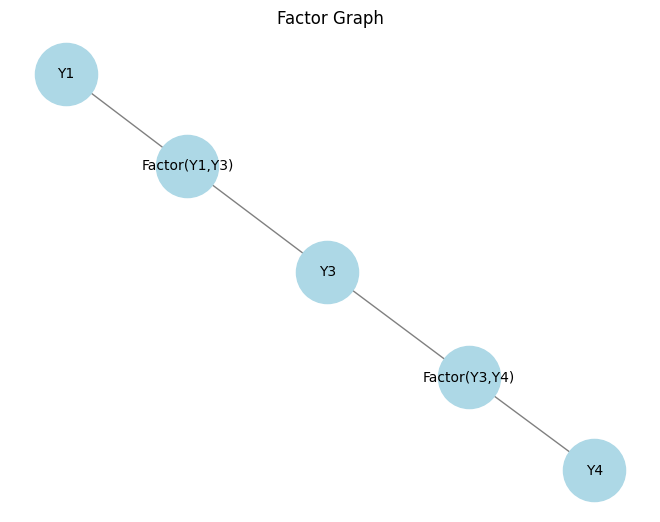

Summed out Y1: New factor ['Y3'] with table:
[0.7 1.6]

Message to Y1 from factor ['Y1', 'Y3']: [0.7 1.6]

Summed out Y3: New factor ['Y1'] with table:
[1.3 1. ]

Message to Y3 from factor ['Y1', 'Y3']: [1.3 1. ]

Summed out Y3: New factor ['Y4'] with table:
[0.7 0.7]

Message to Y3 from factor ['Y3', 'Y4']: [0.91 0.7 ]

Summed out Y4: New factor ['Y3'] with table:
[0.6 0.8]

Message to Y4 from factor ['Y3', 'Y4']: [0.6 0.8]

Summed out Y1: New factor ['Y3'] with table:
[0.7 1.6]

Summed out Y4: New factor ['Y3'] with table:
[0.6 0.8]

Multiplied factors ['Y3'] and ['Y3']: New factor ['Y3'] with table:
[0.42 1.28]

Final marginal probability for Y3: [0.24705882 0.75294118]

Marginal probability of Y3: [0.24705882 0.75294118]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


class Factor:
    def __init__(self, variables, table):
        self.variables = variables
        self.table = table


    def sum_out(self, variable):
        index = self.variables.index(variable)
        new_variables = [v for v in self.variables if v != variable]
        new_table = np.sum(self.table, axis=index)
        print(f"Summed out {variable}: New factor {new_variables} with table:\n{new_table}\n")
        return Factor(new_variables, new_table)


    def multiply(self, other):
        new_variables = list(set(self.variables + other.variables))
        self_shape = tuple(1 if var not in self.variables else len(self.table) for var in new_variables)
        other_shape = tuple(1 if var not in other.variables else len(other.table) for var in new_variables)


        self_table_broadcasted = self.table.reshape(self_shape)
        other_table_broadcasted = other.table.reshape(other_shape)


        new_table = self_table_broadcasted * other_table_broadcasted


        print(f"Multiplied factors {self.variables} and {other.variables}: New factor {new_variables} with table:\n{new_table}\n")
        return Factor(new_variables, new_table)


    def marginalize(self, variable):
        return self.sum_out(variable)


class FactorGraph:
    def __init__(self, factors):
        self.factors = factors


    def draw_graph(self):
        G = nx.Graph()
        for factor in self.factors:
            factor_node = f"Factor({','.join(factor.variables)})"
            G.add_node(factor_node)
            for variable in factor.variables:
                G.add_node(variable)
                G.add_edge(factor_node, variable)
        
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
        plt.title("Factor Graph")
        plt.show()


    def sum_product(self, query_variable):
        self.draw_graph()


        messages = {}
        for factor in self.factors:
            for variable in factor.variables:
                if variable not in messages:
                    messages[variable] = factor.sum_out(variable).table
                else:
                    messages[variable] *= factor.sum_out(variable).table
                print(f"Message to {variable} from factor {factor.variables}: {messages[variable]}\n")


        result = None
        for factor in self.factors:
            current_factor = factor
            for variable in current_factor.variables:
                if variable != query_variable:
                    current_factor = current_factor.sum_out(variable)


            if result is None:
                result = current_factor
            else:
                result = result.multiply(current_factor)


        marginal = result.table / np.sum(result.table)
        print(f"Final marginal probability for {query_variable}: {marginal}\n")
        return marginal


f1 = Factor(['Y1', 'Y3'], np.array([[0.6, 0.7], [0.1, 0.9]]))
f2 = Factor(['Y3', 'Y4'], np.array([[0.4, 0.2], [0.3, 0.5]]))


fg = FactorGraph([f1, f2])


query_variable = 'Y3'
marginal = fg.sum_product(query_variable)
print(f"Marginal probability of {query_variable}: {marginal}")

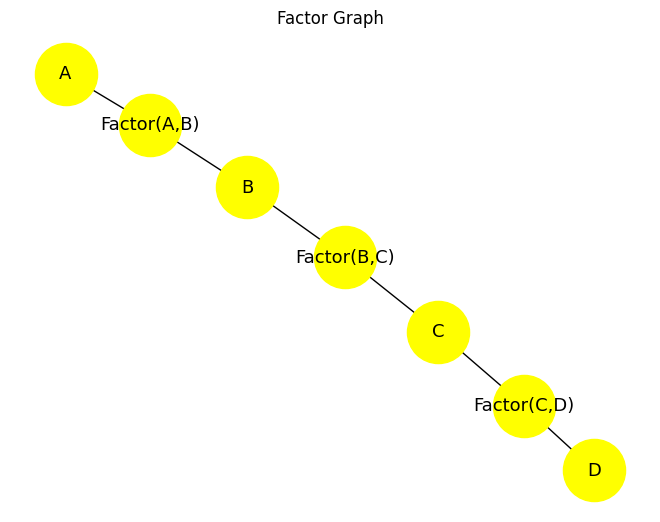

Summed out A: New factor ['B'] with table:
[0.7 1.3]

Message to A from factor ['A', 'B']: [0.7 1.3]

Summed out B: New factor ['A'] with table:
[1. 1.]

Message to B from factor ['A', 'B']: [1. 1.]

Summed out B: New factor ['C'] with table:
[0.5 1.5]

Message to B from factor ['B', 'C']: [0.5 1.5]

Summed out C: New factor ['B'] with table:
[1. 1.]

Message to C from factor ['B', 'C']: [1. 1.]

Summed out C: New factor ['D'] with table:
[0.9 1.1]

Message to C from factor ['C', 'D']: [0.9 1.1]

Summed out D: New factor ['C'] with table:
[1. 1.]

Message to D from factor ['C', 'D']: [1. 1.]

Summed out A: New factor ['B'] with table:
[0.7 1.3]

Summed out B: New factor [] with table:
2.0

Summed out B: New factor ['C'] with table:
[0.5 1.5]

Multiplied factors [] and ['C']: New factor ['C'] with table:
[1. 3.]

Summed out D: New factor ['C'] with table:
[1. 1.]

Multiplied factors ['C'] and ['C']: New factor ['C'] with table:
[1. 3.]

Final marginal probability for C: [0.25 0.75]

Mar

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


class Factor:
    def __init__(self, variables, table):
        self.variables = variables
        self.table = table

    def sum_out(self, variable):
        index = self.variables.index(variable)
        new_variables = [v for v in self.variables if v != variable]
        new_table = np.sum(self.table, axis=index)
        print(f"Summed out {variable}: New factor {new_variables} with table:\n{new_table}\n")
        return Factor(new_variables, new_table)

    def multiply(self, other):
        new_variables = list(set(self.variables + other.variables))
        self_shape = tuple(1 if var not in self.variables else len(self.table) for var in new_variables)
        other_shape = tuple(1 if var not in other.variables else len(other.table) for var in new_variables)

        self_table_broadcasted = self.table.reshape(self_shape)
        other_table_broadcasted = other.table.reshape(other_shape)

        new_table = self_table_broadcasted * other_table_broadcasted

        print(f"Multiplied factors {self.variables} and {other.variables}: New factor {new_variables} with table:\n{new_table}\n")
        return Factor(new_variables, new_table)

    def marginalize(self, variable):
        return self.sum_out(variable)


class FactorGraph:
    def __init__(self, factors):
        self.factors = factors

    def draw_graph(self):
        G = nx.Graph()
        for factor in self.factors:
            factor_node = f"Factor({','.join(factor.variables)})"
            G.add_node(factor_node)
            for variable in factor.variables:
                G.add_node(variable)
                G.add_edge(factor_node, variable)
        
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='yellow', edge_color='black', node_size=2000, font_size=13)
        plt.title("Factor Graph")
        plt.show()

    def sum_product(self, query_variable):
        self.draw_graph()

        messages = {}
        for factor in self.factors:
            for variable in factor.variables:
                if variable not in messages:
                    messages[variable] = factor.sum_out(variable).table
                else:
                    messages[variable] *= factor.sum_out(variable).table
                print(f"Message to {variable} from factor {factor.variables}: {messages[variable]}\n")

        result = None
        for factor in self.factors:
            current_factor = factor
            for variable in current_factor.variables:
                if variable != query_variable:
                    current_factor = current_factor.sum_out(variable)

            if result is None:
                result = current_factor
            else:
                result = result.multiply(current_factor)

        marginal = result.table / np.sum(result.table)
        print(f"Final marginal probability for {query_variable}: {marginal}\n")
        return marginal


# Example usage with specific factors and variables
f1 = Factor(['A', 'B'], np.array([[0.2, 0.8], [0.5, 0.5]]))
f2 = Factor(['B', 'C'], np.array([[0.1, 0.9], [0.4, 0.6]]))
f3 = Factor(['C', 'D'], np.array([[0.3, 0.7], [0.6, 0.4]]))

fg = FactorGraph([f1, f2, f3])

query_variable = 'C'
marginal = fg.sum_product(query_variable)
print(f"Marginal probability of {query_variable}: {marginal}")
